<a href="https://colab.research.google.com/github/Rohawaseem/Task-2/blob/main/week7Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import libraries
import pandas as pd
from google.colab import files

# Upload dataset
print("📤 Please upload your dataset (twitter_sentiment_200.csv)")
uploaded = files.upload()

# Load data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print("✅ Dataset loaded successfully!")
print(df.head())


📤 Please upload your dataset (twitter_sentiment_200.csv)


Saving twitter_sentiment_200.csv to twitter_sentiment_200.csv
✅ Dataset loaded successfully!
                               Tweet ID           Username  \
0  05a72860-7fbf-4565-a43c-961b732f0240  samanthagillespie   
1  0c3735c8-3d67-4c50-b639-14010e918d31            rfisher   
2  044365c9-0e4a-46ce-9a00-1e5d184ec5b7            bgarcia   
3  f37cc2c8-4ebf-483b-a970-ef9c2e0f4d37           robert13   
4  c78dd47e-df0d-47ff-9c29-de9287a96429         erinwalker   

                                          Tweet Text  Retweets  Favorites  \
0  Talk get bag focus pattern necessary. Step com...        81         14   
1  Front measure modern design. Policy go start f...        35         31   
2  Lead which daughter join. Yeah world sort pers...        94         13   
3  Morning first receive. Special land oil.\nWond...        75         54   
4  Artist church ago. Gun hold bank plan natural ...        11         27   

   Followers                   Timestamp Sentiment  
0        409  2022

In [3]:
# Step 2: Prepare data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target labels (Positive, Negative, Neutral → 0,1,2)
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

# Select features
features = ['Retweets', 'Favorites', 'Followers']
X = df[features]
y = df['Sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data ready for training!")


✅ Data ready for training!


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression Evaluation
y_pred_log = log_reg.predict(X_test)
print("🔹 Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("🔹 Random Forest Results")
print(classification_report(y_test, y_pred_rf))


🔹 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.32      0.73      0.44        11
           2       0.75      0.20      0.32        15

    accuracy                           0.40        40
   macro avg       0.51      0.43      0.39        40
weighted avg       0.53      0.40      0.38        40

🔹 Random Forest Results
              precision    recall  f1-score   support

           0       0.44      0.29      0.35        14
           1       0.33      0.45      0.38        11
           2       0.38      0.40      0.39        15

    accuracy                           0.38        40
   macro avg       0.38      0.38      0.37        40
weighted avg       0.39      0.38      0.37        40



In [6]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression Evaluation
y_pred_log = log_reg.predict(X_test)
print("🔹 Logistic Regression Results")
print(classification_report(y_test, y_pred_log))

# Random Forest Evaluation
y_pred_rf = rf.predict(X_test)
print("🔹 Random Forest Results")
print(classification_report(y_test, y_pred_rf))


🔹 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.32      0.73      0.44        11
           2       0.75      0.20      0.32        15

    accuracy                           0.40        40
   macro avg       0.51      0.43      0.39        40
weighted avg       0.53      0.40      0.38        40

🔹 Random Forest Results
              precision    recall  f1-score   support

           0       0.44      0.29      0.35        14
           1       0.33      0.45      0.38        11
           2       0.38      0.40      0.39        15

    accuracy                           0.38        40
   macro avg       0.38      0.38      0.37        40
weighted avg       0.39      0.38      0.37        40



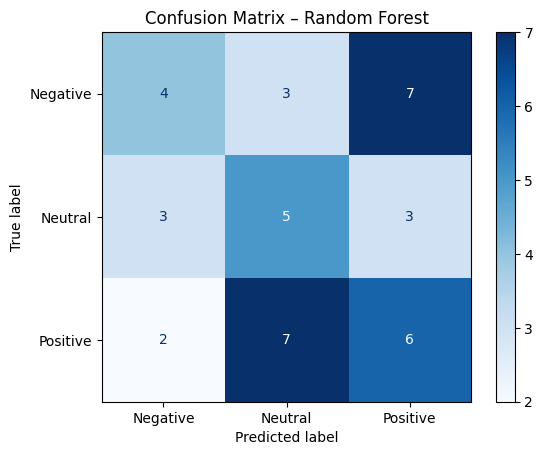

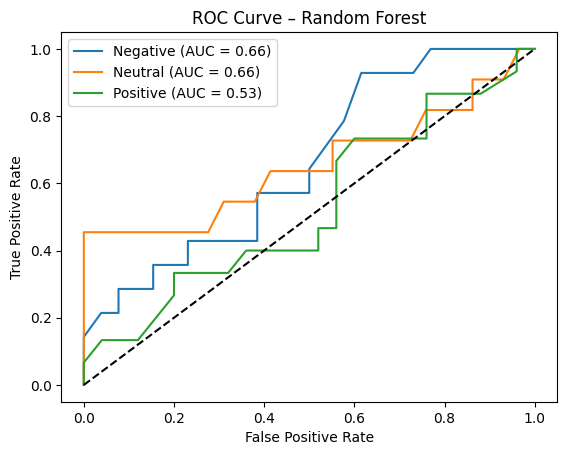

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.show()

# ROC Curve (for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = rf.predict_proba(X_test)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure()
for i, sentiment in enumerate(le.classes_):
    plt.plot(fpr[i], tpr[i], label=f"{sentiment} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()
